# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| age_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
riskFactors <- read.csv("./datos/BCSC_risk_factors_summarized.csv")
riskFactors.replicated <- riskFactors[rep(row.names(riskFactors), riskFactors$count), ]
nrow(riskFactors.replicated)

[1] 6318638

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
i <- sample(1:nrow(riskFactors.replicated),5000, replace = F)
riskFactors.sample <- riskFactors.replicated[i,]
nrow(riskFactors.sample)

[1] 5000

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [3]:
riskFactors.sample[riskFactors.sample$race_eth==9,]$race_eth <- NA
riskFactors.sample[riskFactors.sample$first_degree_hx==9,]$first_degree_hx <- NA
riskFactors.sample[riskFactors.sample$age_menarche==9,]$age_menarche <- NA
riskFactors.sample[riskFactors.sample$age_first_birth==9,]$age_first_birth <- NA
riskFactors.sample[riskFactors.sample$BIRADS_breast_density==9,]$BIRADS_breast_density <- NA
riskFactors.sample[riskFactors.sample$current_hrt==9,]$current_hrt <- NA
riskFactors.sample[riskFactors.sample$menopaus==9,]$menopaus <- NA
riskFactors.sample[riskFactors.sample$bmi_group==9,]$bmi_group <- NA
riskFactors.sample[riskFactors.sample$biophx==9,]$biophx <- NA
riskFactors.sample[riskFactors.sample$breast_cancer_history==9,]$breast_cancer_history <- NA

In [4]:
#Aquí iré transformando en factores las columnas que vaya requiriendo
riskFactors.sample$first_degree_hx <- factor(riskFactors.sample$first_degree_hx,labels = c("NO","SI"))
riskFactors.sample$age_group_5_years <- factor(riskFactors.sample$age_group_5_years, labels = c("Edad 18-29","Edad 30-34","Edad 35-39","Edad 40-44","Edad 45-49","Edad 50-54","Edad 55-59","Edad 60-64","Edad 65-69","Edad 70-74","Edad 75-79","Edad 80-84","Edad ≥85"))
riskFactors.sample$BIRADS_breast_density <- factor(riskFactors.sample$BIRADS_breast_density, labels = c("Almost entirely fat", "Scattered fibroglandular densities", "Heterogeneously dense", "Extremely dense"))
riskFactors.sample$race_eth <- factor(riskFactors.sample$race_eth, labels = c("Non-Hispanic white","Non-Hispanic black","Asian/Pacific Islander","Native American","Hispanic","Other/mixed"))

In [5]:
head(riskFactors.sample)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,Edad 60-64,NA,NA,NA,NA,Scattered fibroglandular densities,NA,2,NA,0,0,218
986739.194,2008,Edad 55-59,2,NO,NA,NA,Scattered fibroglandular densities,0,2,NA,0,0,771
845393.799,2007,Edad 45-49,1,NO,NA,NA,Scattered fibroglandular densities,0,1,NA,0,0,877
996805.11,2008,Edad 60-64,1,SI,1,1,Scattered fibroglandular densities,0,2,2,0,0,32
481428.71,2004,Edad 35-39,1,NO,NA,NA,Heterogeneously dense,0,1,2,0,0,97
169906.1,2001,Edad 50-54,5,NO,NA,NA,Almost entirely fat,1,2,3,0,0,11


#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [6]:
#Para calcular la edad estimada del rango mayores de 85 voy a usar el fichero de la población española, para estimar 
#la media de edad de mujeres mayores de 85
poblacion<-read.csv("../relaciones2variables/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F,col.names=c("edadTxt","Total","Hombres","Mujeres",""))
poblacion<-poblacion[1:105,]
poblacion$edad<-0:104
mayores85 <- subset(poblacion, poblacion$edad>84)
mujeresMayores85 <- mayores85[,c("edad","Mujeres")]
mujeresMayores85$fi <- mujeresMayores85$edad * mujeresMayores85$Mujeres
sumas <- colSums(mujeresMayores85)
edadMediaMujeresMayores85 <- sumas[3] / sumas[2]
mediaMujeresMayores85 <- as.numeric(edadMediaMujeresMayores85)

In [7]:
calcularEdadEstimada <- function (X) {
   edadEstimada <- c()
   for (xi in X) {
       if (xi == "Edad 18-29") {
           edadEstimada <- c(edadEstimada,floor(mean(c(18,29))))
       } else if (xi == "Edad 30-34") {
           edadEstimada <- c(edadEstimada,floor(mean(c(30,34))))
       } else if (xi == "Edad 35-39") {
           edadEstimada <- c(edadEstimada,floor(mean(c(35,39))))
       } else if (xi == "Edad 40-44") {
           edadEstimada <- c(edadEstimada,floor(mean(c(40,44))))
       } else if (xi == "Edad 45-49") {
           edadEstimada <- c(edadEstimada,floor(mean(c(45,49))))
       } else if (xi == "Edad 50-54") {
           edadEstimada <- c(edadEstimada,floor(mean(c(50,54))))
       } else if (xi == "Edad 55-59") {
           edadEstimada <- c(edadEstimada,floor(mean(c(55,59))))
       } else if (xi == "Edad 60-64") {
           edadEstimada <- c(edadEstimada,floor(mean(c(60,64))))
       } else if (xi == "Edad 65-69") {
           edadEstimada <- c(edadEstimada,floor(mean(c(65,69))))
       } else if (xi == "Edad 70-74") {
           edadEstimada <- c(edadEstimada,floor(mean(c(70,74))))
       } else if (xi == "Edad 75-79") {
           edadEstimada <- c(edadEstimada,floor(mean(c(75,79))))
       } else if (xi == "Edad 80-84") {
           edadEstimada <- c(edadEstimada,floor(mean(c(80,84))))
       } else if (xi == "Edad ≥85") {
           edadEstimada <- c(edadEstimada,floor(mediaMujeresMayores85))
       }
   }
   return (edadEstimada)
}
riskFactors.sample$edad <- calcularEdadEstimada(riskFactors.sample$age_group_5_years)
head(riskFactors.sample,10)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,edad
792997.89,2006,Edad 60-64,NA,NA,NA,NA,Scattered fibroglandular densities,NA,2,NA,0,0,218,62
986739.194,2008,Edad 55-59,2,NO,NA,NA,Scattered fibroglandular densities,0,2,NA,0,0,771,57
845393.799,2007,Edad 45-49,1,NO,NA,NA,Scattered fibroglandular densities,0,1,NA,0,0,877,47
996805.11,2008,Edad 60-64,1,SI,1,1,Scattered fibroglandular densities,0,2,2,0,0,32,62
481428.71,2004,Edad 35-39,1,NO,NA,NA,Heterogeneously dense,0,1,2,0,0,97,37
169906.1,2001,Edad 50-54,5,NO,NA,NA,Almost entirely fat,1,2,3,0,0,11,52
333718.105,2002,Edad 70-74,1,NO,NA,NA,NA,0,2,2,0,0,148,72
537807.1888,2004,Edad 50-54,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5518,52
801853.11,2006,Edad 65-69,NA,NO,NA,1,Almost entirely fat,0,2,NA,0,0,24,67
1126577,2009,Edad 70-74,1,NA,2,NA,Scattered fibroglandular densities,0,2,2,0,0,1,72


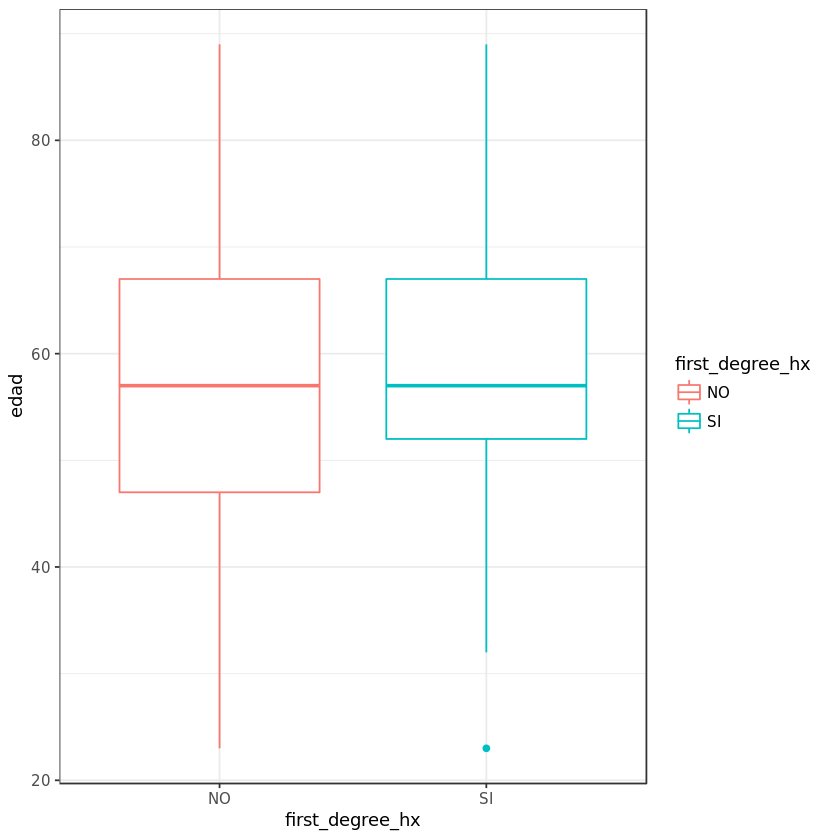

In [8]:
library(ggplot2)
riskFactorsByAntecedentes <- subset(riskFactors.sample,!is.na(first_degree_hx))
ggplot(riskFactorsByAntecedentes,aes(x=first_degree_hx,y=edad,color=first_degree_hx))+geom_boxplot()+theme_bw()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [9]:
#A simple vista viendo el gráfico anterior parece que no existe diferencia, vamos a comprobarlo con un test estadístico.
#Usaré un test de Welch
t.test(riskFactorsByAntecedentes$edad[riskFactorsByAntecedentes$first_degree_hx=="SI"],riskFactorsByAntecedentes$edad[riskFactorsByAntecedentes$first_degree_hx=="NO"])


	Welch Two Sample t-test

data:  riskFactorsByAntecedentes$edad[riskFactorsByAntecedentes$first_degree_hx ==  and riskFactorsByAntecedentes$edad[riskFactorsByAntecedentes$first_degree_hx ==     "SI"] and     "NO"]
t = 4.654, df = 1011.5, p-value = 3.687e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.374705 3.379062
sample estimates:
mean of x mean of y 
 58.92537  56.54849 


El valor bajo de p-value me indica que debo rechazar la hipótesis nula, es decir, existe diferencia significativa entre la edad de aparición del cancer y si hay antecedentes familiares o no, al contrario de lo que podía parecer al principio con lo observado en el gráfico.

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

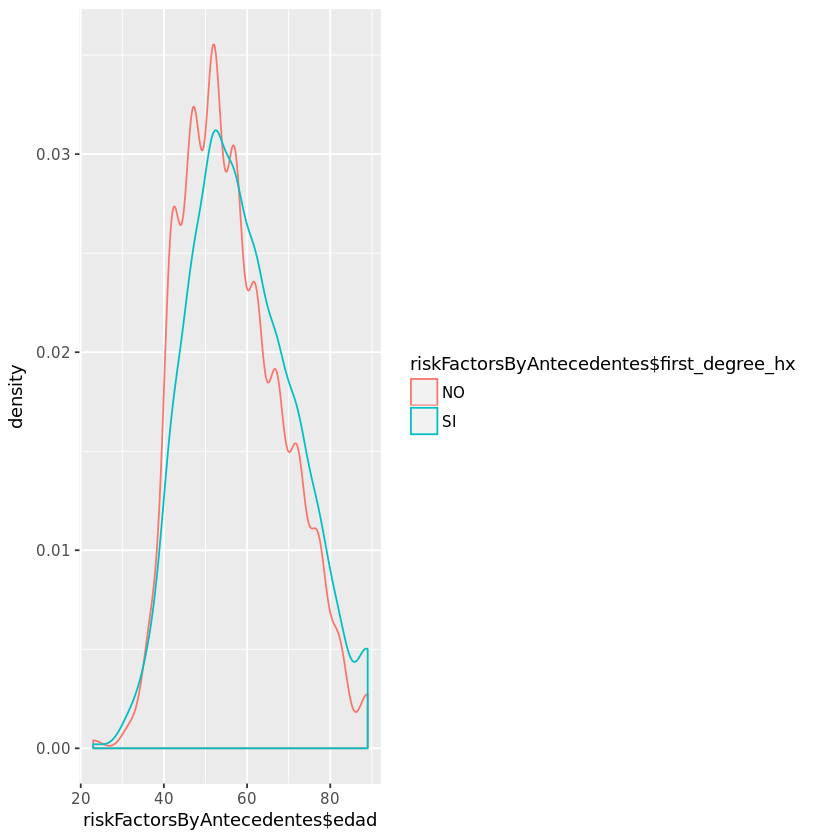

In [10]:
ggplot(data=riskFactorsByAntecedentes, aes(x=riskFactorsByAntecedentes$edad,color=riskFactorsByAntecedentes$first_degree_hx)) + 
    geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

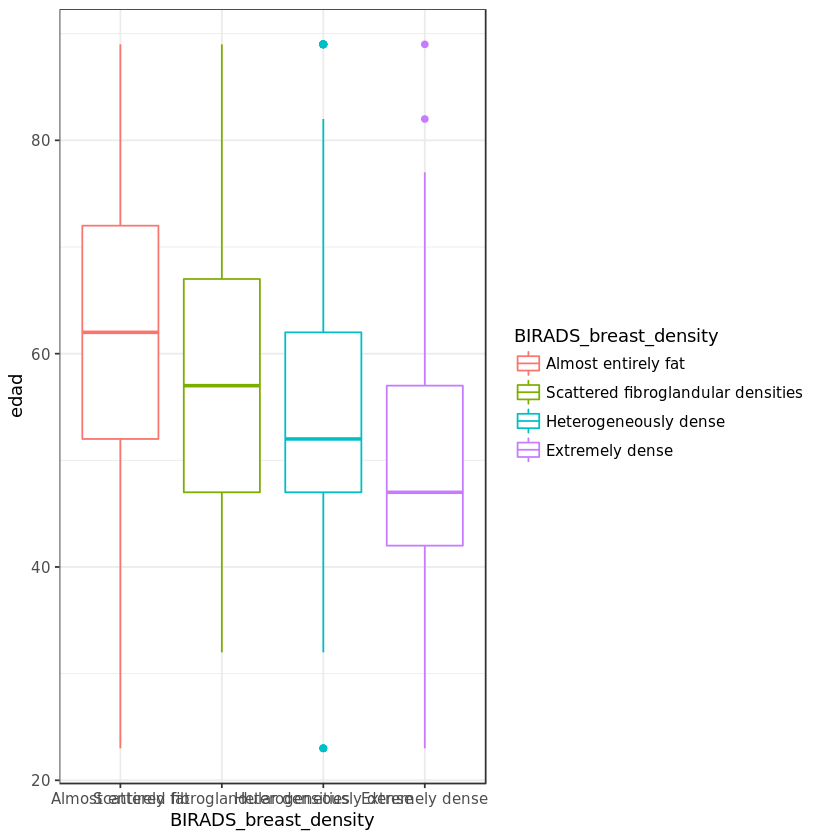

In [11]:
riskFactorsByDensidad <- subset(riskFactors.sample,!is.na(BIRADS_breast_density))
ggplot(riskFactorsByDensidad,aes(x=BIRADS_breast_density,y=edad,color=BIRADS_breast_density))+geom_boxplot()+theme_bw()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

En este caso usaríamos el test chi cuadrado de Pearson, para validar la independencia de datos categóricos. Las hipótesis son:

La hipótesis nula  **H0**  es que las variables son independientes, es decir, no existe evidencia estadística significativa como para decir que la edad en la que se detecta el cancer depende de la densidad.
La hipótesis alternativa  **H1**  es que hay una relación estadística o asociación entre variables, por lo que podríamos concluir que sí que existe dependencia entre la edad y la densidad del cancer.

In [12]:
#tabla<-table(riskFactorsByDensidad[,c("BIRADS_breast_density","edad")])
#chisq.test(tabla)
model<-lm(data=riskFactorsByDensidad, formula = edad ~ BIRADS_breast_density)
summary(model)


Call:
lm(formula = edad ~ BIRADS_breast_density, data = riskFactorsByDensidad)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.364  -8.243  -1.664   8.336  38.215 

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                              60.3636     0.7025
BIRADS_breast_densityScattered fibroglandular densities  -1.6994     0.7626
BIRADS_breast_densityHeterogeneously dense               -5.1210     0.7710
BIRADS_breast_densityExtremely dense                     -9.5785     1.0325
                                                        t value Pr(>|t|)    
(Intercept)                                              85.928  < 2e-16 ***
BIRADS_breast_densityScattered fibroglandular densities  -2.228   0.0259 *  
BIRADS_breast_densityHeterogeneously dense               -6.642 3.56e-11 ***
BIRADS_breast_densityExtremely dense                     -9.277  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

El valor tan bajo de p-valor me indica que puedo rechazar la hipótesis nula y concluir que la edad en la que se detecta
el cáncer **SI** depende de la densidad del cáncer.

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [13]:
#Comprobamos si todos los tipos de cancer son equiprobables con el test de homogeneidad
tabla<-table(riskFactorsByDensidad[,c("BIRADS_breast_density","edad")])
chisq.test(tabla)

Warning message in chisq.test(tabla):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  tabla
X-squared = 182.5, df = 36, p-value < 2.2e-16


El valor tan bajo de p-value me indica que debo rechazar la hipótesis nula y concluir que no hay diferencias de 
probabilidades entre cada uno de los tipos de cáncer.

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [16]:
tabla <- addmargins(tabla, 2)
tabla

,23,32,37,42,47,52,57,62,67,72,77,82,89,Sum
Almost entirely fat,1,3,4,19,29,48,44,39,35,38,20,8,9,297
Scattered fibroglandular densities,0,6,36,177,204,268,261,186,170,161,100,63,33,1665
Heterogeneously dense,5,13,54,225,240,242,196,157,123,81,54,36,25,1451
Extremely dense,2,1,15,54,58,50,35,19,8,6,6,1,1,256


In [22]:
#TODO: Hacer de una forma más elegante esta operación o por lo menos la suma de los totales 3669
pAlmostEnterelyFat <- 297/3669
pScattered <- 1665/3669
pHeterogeneously <- 1451/3669
pExtremely <- 256/3669
print(paste("La probabilidad del tipo 1 es",pAlmostEnterelyFat))
print(paste("La probabilidad del tipo 2 es",pScattered))
print(paste("La probabilidad del tipo 3 es",pHeterogeneously))
print(paste("La probabilidad del tipo 4 es",pExtremely))

[1] "La probabilidad del tipo 1 es 0.0809484873262469"
[1] "La probabilidad del tipo 2 es 0.453802125919869"
[1] "La probabilidad del tipo 3 es 0.39547560643227"
[1] "La probabilidad del tipo 4 es 0.0697737803216135"


Por tanto el tipo de cáncer más común es **Scattered fibroglandular densities** con una proporción del 45%

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [24]:
#Voy a usar un test de independencia
tablaAntecedentes <- table(riskFactorsByDensidad[,c("BIRADS_breast_density","first_degree_hx")])
chisq.test(tablaAntecedentes)


	Pearson's Chi-squared test

data:  tablaAntecedentes
X-squared = 4.2475, df = 3, p-value = 0.236


El p-valor es alto, por lo que no puedo rechazar la hipótesis nula y tengo que concluir que no existe evidencia estadística significativa como para decir el tipo de cáncer depende de si ha habido o no antecedentes familiares.

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [29]:
#Repito el mismo procedimiento que en el paso anterior
tablaGEtnico <- table(riskFactorsByDensidad[,c("BIRADS_breast_density","race_eth")])
chisq.test(tablaGEtnico)

Warning message in chisq.test(tablaGEtnico):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  tablaGEtnico
X-squared = 48.684, df = 15, p-value = 1.971e-05


En este caso el p-valor es bajo, por lo que podríamos rechazar la hipótesis nula y concluir que si existe una dependencia 
entre el tipo de cáncer y el grupo étnico

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [40]:
riskFactors.limpio <- subset(riskFactors.sample,!is.na(BIRADS_breast_density))
riskFactors.limpio <- subset(riskFactors.limpio,!is.na(race_eth))

In [65]:
n <- nrow(subset(riskFactors.limpio, BIRADS_breast_density == "Almost entirely fat"))
ns <- nrow(subset(riskFactors.limpio,race_eth == "Native American" & BIRADS_breast_density == "Almost entirely fat"))

In [66]:
#Método de Wald
pval<-0.05
prop.test(ns,n,conf.level = 1-pval)


	1-sample proportions test with continuity correction

data:  ns out of n, null probability 0.5
X-squared = 261.03, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.0001955372 0.0239615134
sample estimates:
          p 
0.003745318 


La probabilidad es de un 0.37%

In [67]:
#Intervalo de confianza de proporcion binomal
binom.test(ns,n)


	Exact binomial test

data:  ns and n
number of successes = 1, number of trials = 267, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 9.481876e-05 2.068980e-02
sample estimates:
probability of success 
           0.003745318 


Observamos que en ambos casos nos sale la misma probabilidad, aunque con un intervalo de confianza diferente